### Sklearn Breast Cancer dataset solution

In [1]:
import tensorflow as tf
import keras as k
import keras.layers as l
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


np.random.seed(2)
data = load_breast_cancer()

# Impute missing values
imp = SimpleImputer(missing_values=np.nan, strategy='median')
X = imp.fit_transform(data["data"])

# Encode targets
y = OneHotEncoder(sparse=False).fit_transform(data["target"].reshape(-1,1))
df = pd.DataFrame(np.c_[X, y], columns=list(data["feature_names"]) + list(data["target_names"]))
print(f"X={X.shape}, y={y.shape}")
df.head()

X=(569, 30), y=(569, 2)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1.0,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1.0,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1.0,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1.0,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1.0,0.0


In [2]:
print(data["feature_names"])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [3]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, shuffle=True, test_size=0.1)
print(xtrain.shape, xtest.shape)

(512, 30) (57, 30)


In [4]:
def init_model():
    return k.Sequential([
        l.Input(shape=(30,)),
        l.Dense(128, activation="relu"),
        l.Dense(32, activation="relu"),
        l.Dense(2, activation="softmax")
    ])

init_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 8,162
Trainable params: 8,162
Non-trainable params: 0
_________________________________________________________________


In [12]:
model = init_model()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(xtrain, ytrain, batch_size=10, epochs=60, verbose=True, validation_data=(xtest, ytest))

Epoch 1/60
52/52 [==============================] - 0s 2ms/step - loss: 13.9308 - accuracy: 0.5840 - val_loss: 0.3382 - val_accuracy: 0.8772
Epoch 2/60
52/52 [==============================] - 0s 730us/step - loss: 0.5377 - accuracy: 0.8827 - val_loss: 0.7291 - val_accuracy: 0.7544
Epoch 3/60
52/52 [==============================] - 0s 693us/step - loss: 0.4090 - accuracy: 0.8734 - val_loss: 0.1685 - val_accuracy: 0.9474
Epoch 4/60
52/52 [==============================] - 0s 733us/step - loss: 0.3880 - accuracy: 0.8953 - val_loss: 0.1202 - val_accuracy: 0.9474
Epoch 5/60
52/52 [==============================] - 0s 745us/step - loss: 0.5051 - accuracy: 0.8612 - val_loss: 0.4681 - val_accuracy: 0.8596
Epoch 6/60
52/52 [==============================] - 0s 671us/step - loss: 0.3554 - accuracy: 0.8831 - val_loss: 0.0679 - val_accuracy: 0.9825
Epoch 7/60
52/52 [==============================] - 0s 683us/step - loss: 0.3247 - accuracy: 0.8991 - val_loss: 0.0640 - val_accuracy: 0.9825
Epoch 8

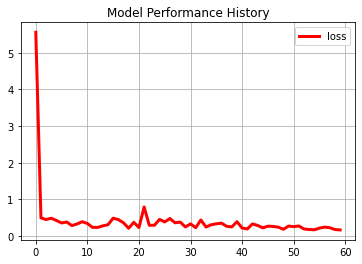

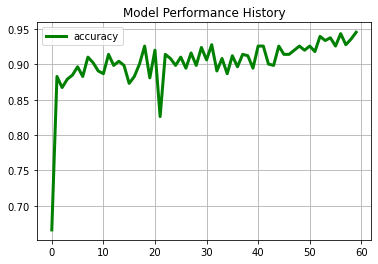

In [14]:
plt.grid()
plt.title("Model Performance History")
plt.plot(history.history['loss'], c="r", linewidth=3)
plt.legend(["loss"])
plt.show()

plt.grid()
plt.title("Model Performance History")
plt.plot(history.history['accuracy'], c="g", linewidth=3)
plt.legend(["accuracy"])
plt.show()